hello


0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     1
15     1
16     0
17     0
18     1
19     1
20     0
21     0
22     1
23     0
24     1
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    1
864    0
865    1
866    1
867    0
868    0
869    0
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    1
883    0
884    0
885    1
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

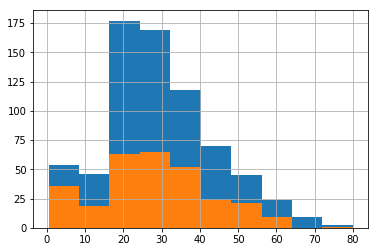

In [58]:
%matplotlib inline
import pandas as pd


df = pd.read_csv("train.csv")
df.columns
df.dtypes
df.describe()
df.count()

df["Age"].hist()
df[df["Survived"] == 1] # On récupère que ceux qui ont survécu
df[df["Survived"] == 1]["Age"].hist()
print("hello")

df["Sex"] = df["Sex"].map({"male": 0, "female": 1})


In [55]:
# len(df[(df["Survived"] == 1) & ()])
total = len(df)
# proportion de femmes
p_f = len(df[(df["Sex"] == "female")]) / total
# proportion d'hommes
p_h = len(df[(df["Sex"] == "male")]) / total
# proportion de femmes qui survivent
p_fs = len(df[(df["Sex"] == "female") & (df["Survived"] == 1)]) / len(df[(df["Sex"] == "female")])
# proportion d'hommes qui survivent
p_hs = len(df[(df["Sex"] == "male") & (df["Survived"] == 1)]) / len(df[(df["Sex"] == "male")])
# len(df["Sex"].dropna())

print(f"""
    Proportion de femmes : {p_f}
    Proportion d'hommes : {p_h}
    Proportion de femmes qui survivent : {p_fs}
    Proportion d'hommes qui survivent : {p_hs}
""")


    Proportion de femmes : 0.35241301907968575
    Proportion d'hommes : 0.6475869809203143
    Proportion de femmes qui survivent : 0.7420382165605095
    Proportion d'hommes qui survivent : 0.18890814558058924



In [97]:
df = pd.read_csv("train.csv")
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
# df.groupby("Embarked").count()
df["Embarked"] = df["Embarked"].map({"S":0, "C": 1, "Q": 2})
df.drop(columns=["Cabin", "Ticket"], inplace=True)
df.dropna(inplace=True)

import re 

# chaine = "Cumings, Mrs. John Bradley (Florence Briggs Th"
# print(re.findall(", (.*)\.", chaine))

def extract_title(name):
    return re.findall(", ([^\.]*)\.", name)[0]

df.Title = df.Name.map(extract_title)
titles = list(df.Title.unique())
df.Title = df.Title.map(lambda t: titles.index(t))

C:\Users\miguel\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  app.launch_new_instance()
